# Download dataset with Pytorch



## Load the data

In [1]:
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
from PIL import Image


# Define transformation for each image
transform  = transforms.Compose([
    transforms.Lambda(lambda x: np.array(x).flatten()) #Stretch image into row [32,32,3] -> [3072]
])

# Download a CIFAR10 dataset
dataset = datasets.CIFAR10("content",
                           train=True,
                           transform = transform,
                           download=True)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting content/cifar-10-python.tar.gz to content


## Split dataset & define dataloaders

torch.Size([256, 3072]) torch.Size([256])


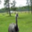

2

In [2]:
train_ds, val_ds, _= random_split(dataset, [20000,1000 ,29000])
# Hint: Perform debug on smaller subset

batch_size = 256

train_loader = DataLoader(train_ds, batch_size = batch_size)
val_loader = DataLoader(val_ds, batch_size = batch_size)

# Display one image
for images, class_nums in train_loader:
  print (images.shape,class_nums.shape) # class_nums are tensor!
  display(Image.fromarray(images[0].reshape((32,32,3)).numpy()),class_nums[0].item()) 
  break 


# Implement LinearClassifier class for CIFAR10

In [3]:
class LinearClassifier:
  def __init__(self, labels):
    self.labels = labels
    self.classes_num = len(labels)
    # Generate a random weight matrix of small numbers
    # You can change this code
    self.W = np.random.randn(3072, self.classes_num) * 0.0001 
    self.batch_size = 200

  
  def train(self, x_batch, y_batch, learning_rate = 1e-8):
    """
      Arguments:
        x  (numpy.array): collection of objects (batch)
        y  (numpy.array): collection of integer 
        representing a class number for objects from x
    
    """
    #x_batch = x_batch[0:self.batch_size]
    #y_batch = y_batch[0:self.batch_size]
    
    loss_val, grad = self.loss(x_batch, y_batch)

    # Update weights (self.W)
    self.W -= grad * learning_rate

    return loss_val / x_batch.shape[0]

  def loss(self,x, y): # x and y are batches
    """
      Arguments:
        x  (numpy.array): collection of objects (batch)
        y  (numpy.array): collection of integer 
        representing a class number for objects from x
    
    """

    loss = 0.0
    dW = np.zeros(self.W.shape)

    # Calculate Multiclass SVM or Cross-entropy loss over a batch 

    # Calculate gradients (dL/dW) and store it in dW

    for i in range(x.shape[0]):
      scores = x[i].dot(self.W)
      correct_class_score = scores[int(y[i])]
      above_zero_loss_count = 0
      for j in range(self.W.shape[1]):
        if j == y[i]:
          continue
        margin = scores[j] - correct_class_score + 1
        if margin > 0:
          above_zero_loss_count += 1
          loss += margin
          dW[:, j] += x[i]
      dW[:,y[i]] -= above_zero_loss_count * x[i]

    return loss, dW
      
  def predict(self,x):
    #x = self.add_ones(x)
    scores = x.dot(self.W) # (256, 3073) * (3073, 10)
    return np.argmax(scores,axis = 1)


# Train model

## Function for accuracy checking

Don't change this code

In [4]:
from sklearn.metrics import accuracy_score

def validate(model,dataloader):
  y_predicted = np.array([])
  y_gtrue = np.array([])
  for images, class_nums in dataloader:
    index = model.predict(images.numpy())
    y_predicted = np.append(y_predicted,index) 
    y_gtrue = np.append(y_gtrue,class_nums.numpy()) 
  return accuracy_score(y_gtrue, y_predicted)  

## Train loop
Let's train our model

In [5]:

model = LinearClassifier(dataset.classes)
best_accuracy = 0
for epoch in range(25):
  for images, class_nums in train_loader:
    loss = model.train(images.numpy(), class_nums.numpy())
    accuracy = validate(model,val_loader)
  if best_accuracy < accuracy:
     best_accuracy = accuracy
  print(f"Epoch {epoch} Loss: {loss}, Accuracy:{accuracy}")

print(f"Best accuracy is {best_accuracy}")

Epoch 0 Loss: 75.7757985073543, Accuracy:0.221
Epoch 1 Loss: 52.568032894581776, Accuracy:0.269
Epoch 2 Loss: 64.01096485084705, Accuracy:0.251
Epoch 3 Loss: 69.44016885640985, Accuracy:0.247
Epoch 4 Loss: 69.48556064510893, Accuracy:0.283
Epoch 5 Loss: 79.71309206404138, Accuracy:0.237
Epoch 6 Loss: 54.38794001155901, Accuracy:0.241
Epoch 7 Loss: 70.09200190654724, Accuracy:0.262
Epoch 8 Loss: 61.81063579890747, Accuracy:0.24
Epoch 9 Loss: 58.75101549387841, Accuracy:0.274
Epoch 10 Loss: 68.12330789348073, Accuracy:0.193
Epoch 11 Loss: 112.73638104814256, Accuracy:0.213
Epoch 12 Loss: 97.00981353387147, Accuracy:0.235
Epoch 13 Loss: 64.71090011163994, Accuracy:0.258
Epoch 14 Loss: 53.493587993737606, Accuracy:0.266
Epoch 15 Loss: 65.6018321949191, Accuracy:0.219
Epoch 16 Loss: 44.440402487017764, Accuracy:0.263
Epoch 17 Loss: 76.26670323966437, Accuracy:0.26
Epoch 18 Loss: 80.41668421158533, Accuracy:0.268
Epoch 19 Loss: 51.35797296904332, Accuracy:0.259
Epoch 20 Loss: 48.854449308596

# Check model on test dataset

You must get accuracy above 0.35


In [6]:
test_dataset = datasets.CIFAR10("content",
                           train=False,
                           transform = transform, # Transforms stay the same
                           download=True)

test_loader = DataLoader(test_dataset, batch_size = batch_size)

accuracy = validate(model,test_loader)
print(f"Accuracy on test:{accuracy}")


Files already downloaded and verified
Accuracy on test:0.2515


# Place for brief conclusion
Feel free to describe troubles here.


...



# Ideas for extra work

- Implenment CrossEntropyLoss function
- Implement bias trick
- Add regularization to SVM loss
- Find best learning rate and regularization strength using Cross-Validation
- Normalize data


 